<a href="https://colab.research.google.com/github/marcmore/imdb_top_1000_movies/blob/main/Notebook/imdb_top_1000.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**IMDB TOP 1000 Filmes**

**Sumário do Projeto**
1. Introdução
2. Importação e Preparação dos Dados
3. Curiosidades
4. Conclusão
5. Referências

##**1. Introdução**

Iremos buscar algumas curiosidades sobre os TOP 1000 filmes do IMDB.

Para isso iremos usar um dataset que foi exportado do Kaggle (https://www.kaggle.com/omarhanyy/imdb-top-1000).

Iremos analisar também os filmes ganhadores do Oscar de melhor filme e para isso usaremos o dataset vindo do wikipedia (https://pt.wikipedia.org/wiki/Oscar_de_melhor_filme).

IMDb, também conhecida como Internet Movie Database, é uma base de dados online de informação sobre cinema, TV, música e games, hoje pertencente à Amazon.

O Kaggle é um excelente recurso para pessoas que são iniciantes em ciência de dados e aprendizado de máquina.



##**2. Importação e Preparação dos Dados**

Os dados que foram exportados do kaggle foram importados para o github, e uma vez no github importei-os para esse projeto.

In [1]:
import pandas as pd
dados = pd.read_csv('https://raw.githubusercontent.com/marcmore/imdb_top_1000_movies/main/dados/imdb_top_1000.csv')

In [2]:
dados.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


No processo de limpeza do dataset, foram deletados algumas colunas que não seriam utilizadas nas análises.

In [3]:
dados_desejados = dados.drop(['Poster_Link','Certificate','Overview','Meta_score','Star3','Star4','Gross'], 1)

In [4]:
dados_desejados.head()

,Series_Title,Released_Year,Runtime,Genre,IMDB_Rating,Director,Star1,Star2,No_of_Votes
0,The Shawshank Redemption,1994,142 min,Drama,9.3,Frank Darabont,Tim Robbins,Morgan Freeman,2343110
1,The Godfather,1972,175 min,"Crime, Drama",9.2,Francis Ford Coppola,Marlon Brando,Al Pacino,1620367
2,The Dark Knight,2008,152 min,"Action, Crime, Drama",9.0,Christopher Nolan,Christian Bale,Heath Ledger,2303232
3,The Godfather: Part II,1974,202 min,"Crime, Drama",9.0,Francis Ford Coppola,Al Pacino,Robert De Niro,1129952
4,12 Angry Men,1957,96 min,"Crime, Drama",9.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,689845


Logo depois foram renomeadas as colunas.

In [5]:
dados_desejados = dados_desejados.rename(columns={'Series_Title': 'filme', 'Released_Year': 'ano_lancamento','Runtime': 'duracao','Genre': 'genero','IMDB_Rating': 'rating','Director': 'diretor','Star1': 'protagonista','Star2': 'coadjuvante','No_of_Votes': 'votos'})

In [6]:
dados_desejados.head()

,filme,ano_lancamento,duracao,genero,rating,diretor,protagonista,coadjuvante,votos
0,The Shawshank Redemption,1994,142 min,Drama,9.3,Frank Darabont,Tim Robbins,Morgan Freeman,2343110
1,The Godfather,1972,175 min,"Crime, Drama",9.2,Francis Ford Coppola,Marlon Brando,Al Pacino,1620367
2,The Dark Knight,2008,152 min,"Action, Crime, Drama",9.0,Christopher Nolan,Christian Bale,Heath Ledger,2303232
3,The Godfather: Part II,1974,202 min,"Crime, Drama",9.0,Francis Ford Coppola,Al Pacino,Robert De Niro,1129952
4,12 Angry Men,1957,96 min,"Crime, Drama",9.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,689845


Na tabela acima não temos informações de quais filmes ganharam o Oscar de melhor filme, e como parte das análises essas informações serão necessárias.

Portanto, para resolver essa questão, iremos importar as informações dos filmes ganhadores do Oscar de melhor filme do wikipedia, e logo em seguida será feita um merge entre ambas as tabelas.

Como forma de preparação para essa atividade, foi criado uma coluna chamada Oscar, onde será identificado se um filme foi o vencedor do Oscar de melhor filme ou não.

In [7]:
dados_desejados['Oscar']= 'Na'

In [8]:
dados_desejados.head()

,filme,ano_lancamento,duracao,genero,rating,diretor,protagonista,coadjuvante,votos,Oscar
0,The Shawshank Redemption,1994,142 min,Drama,9.3,Frank Darabont,Tim Robbins,Morgan Freeman,2343110,Na
1,The Godfather,1972,175 min,"Crime, Drama",9.2,Francis Ford Coppola,Marlon Brando,Al Pacino,1620367,Na
2,The Dark Knight,2008,152 min,"Action, Crime, Drama",9.0,Christopher Nolan,Christian Bale,Heath Ledger,2303232,Na
3,The Godfather: Part II,1974,202 min,"Crime, Drama",9.0,Francis Ford Coppola,Al Pacino,Robert De Niro,1129952,Na
4,12 Angry Men,1957,96 min,"Crime, Drama",9.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,689845,Na


Importando a tabela de filmes que ganharam o Oscar do wikipedia

In [9]:
wikipedia = pd.read_html('https://pt.wikipedia.org/wiki/Oscar_de_melhor_filme',skiprows=[2,	3,	5,	6,	7,	8,	10,	11,	12,	13,	15,	16,	17,	18,	20,	21,	22,	23,	24,	25,	26,	28,	29,	30,	31,	32,	33,	34,	35,	36,	38,	39,	40,	41,	42,	43,	44,	45,	46,	47,	48,	50,	51,	52,	53,	54,	55,	56,	57,	58,	59,	60,	62,	63,	64,	65,	66,	67,	68,	69,	70,	72,	73,	74,	75,	76,	77,	78,	79,	80,	82,	83,	84,	85,	86,	87,	88,	89,	90,	92,	93,	94,	95,	96,	97,	98,	99,	100,	102,	103,	104,	105,	106,	107,	108,	109,	110,	112,	113,	114,	115,	116,	117,	118,	119,	120,	122,	123,	124,	125,	126,	127,	128,	129,	130,	132,	133,	134,	135,	136,	137,	138,	139,	140,	142,	143,	144,	145,	147,	148,	149,	150,	152,	153,	154,	155,	157,	158,	159,	160,	162,	163,	164,	165,	167,	168,	169,	170,	172,	173,	174,	175,	177,	178,	179,	180,	182,	183,	184,	185,	187,	188,	189,	190,	192,	193,	194,	195,	197,	198,	199,	200,	202,	203,	204,	205,	207,	208,	209,	210,	212,	213,	214,	215,	217,	218,	219,	220,	222,	223,	224,	225,	227,	228,	229,	230,	232,	233,	234,	235,	237,	238,	239,	240,	242,	243,	244,	245,	247,	248,	249,	250,	252,	253,	254,	255,	257,	258,	259,	260,	262,	263,	264,	265,	267,	268,	269,	270,	272,	273,	274,	275,	277,	278,	279,	280,	282,	283,	284,	285,	287,	288,	289,	290,	292,	293,	294,	295,	297,	298,	299,	300,	302,	303,	304,	305,	307,	308,	309,	310,	312,	313,	314,	315,	317,	318,	319,	320,	322,	323,	324,	325,	327,	328,	329,	330,	332,	333,	334,	335,	337,	338,	339,	340,	342,	343,	344,	345,	347,	348,	349,	350,	352,	353,	354,	355,	357,	358,	359,	360,	362,	363,	364,	365,	367,	368,	369,	370,	372,	373,	374,	375,	377,	378,	379,	380,	382,	383,	384,	385,	387,	388,	389,	390,	392,	393,	394,	395,	397,	398,	399,	400,	402,	403,	404,	405,	407,	408,	409,	410,	412,	413,	414,	415,	417,	418,	419,	420,	422,	423,	424,	425,	427,	428,	429,	430,	432,	433,	434,	435,	437,	438,	439,	440,	442,	443,	444,	445,	447,	448,	449,	450,	452,	453,	454,	455,	457,	458,	459,	460,	462,	463,	464,	465,	467,	468,	469,	470,	471,	472,	473,	474,	475,	477,	478,	479,	480,	481,	482,	483,	484,	485,	487,	488,	489,	490,	491,	492,	493,	494,	496,	497,	498,	499,	500,	501,	502,	503,	505,	506,	507,	508,	509,	510,	511,	512,	514,	515,	516,	517,	518,	519,	520,	522,	523,	524,	525,	526,	527,	528,	530,	531,	532,	533,	534,	535,	536,	537,	539,	540,	541,	542,	543,	544,	545,	546,	548,	549,	550,	551,	552,	553,	554,	556,	557,	558,	559,	560,	561,	562,	563,	565,	566,	567,	568,	569,	570,	571])

In [10]:
oscar = wikipedia[2]

In [11]:
oscar.head()

,0,1,2,3
0,Data,Título original,Título em Portugal,Título no Brasil
1,"1.ª edição, 16 de maio de 1929",Wings,Asas,Asas
2,"2.ª edição, 3 de abril de 1930",The Broadway Melody,A Melodia da Broadway,Melodia na Broadway
3,"3.ª edição, 5 de novembro de 1930",All Quiet on the Western Front,A Oeste Nada de Novo,Nada de Novo no Front / Sem Novidades no Front
4,"4.ª edição, 10 de novembro de 1931",Cimarron,Cimarron,Cimarron


Aqui é feito uma comparação entre as tabelas, do imdb e do wikipedia, os filmes do imdb que ganharam o Oscar serão identificados na tabela do imdb.

In [12]:
i = 0
for filmes in dados_desejados['filme']:
  for filmes_wiki in oscar[1]:
    if filmes == filmes_wiki:
      dados_desejados.loc[i,'Oscar'] = "Sim"
      break
    elif filmes != filmes_wiki:
      dados_desejados.loc[i,'Oscar'] = "Não"
  i = i + 1

A tabela abaixo já identifica quais filmes ganharam o Oscar.

In [13]:
dados_desejados.head(10)

,filme,ano_lancamento,duracao,genero,rating,diretor,protagonista,coadjuvante,votos,Oscar
0,The Shawshank Redemption,1994,142 min,Drama,9.3,Frank Darabont,Tim Robbins,Morgan Freeman,2343110,Não
1,The Godfather,1972,175 min,"Crime, Drama",9.2,Francis Ford Coppola,Marlon Brando,Al Pacino,1620367,Sim
2,The Dark Knight,2008,152 min,"Action, Crime, Drama",9.0,Christopher Nolan,Christian Bale,Heath Ledger,2303232,Não
3,The Godfather: Part II,1974,202 min,"Crime, Drama",9.0,Francis Ford Coppola,Al Pacino,Robert De Niro,1129952,Sim
4,12 Angry Men,1957,96 min,"Crime, Drama",9.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,689845,Não
5,The Lord of the Rings: The Return of the King,2003,201 min,"Action, Adventure, Drama",8.9,Peter Jackson,Elijah Wood,Viggo Mortensen,1642758,Sim
6,Pulp Fiction,1994,154 min,"Crime, Drama",8.9,Quentin Tarantino,John Travolta,Uma Thurman,1826188,Não
7,Schindler's List,1993,195 min,"Biography, Drama, History",8.9,Steven Spielberg,Liam Neeson,Ralph Fiennes,1213505,Sim
8,Inception,2010,148 min,"Action, Adventure, Sci-Fi",8.8,Christopher Nolan,Leonardo DiCaprio,Joseph Gordon-Levitt,2067042,Não
9,Fight Club,1999,139 min,Drama,8.8,David Fincher,Brad Pitt,Edward Norton,1854740,Não


Agora com o tabela preparada iremos olhar algumas curiosidades.

##**3.Curiosidades**

- 3.1 Quais filmes entre os top 10 ganharam o Oscar
- 3.2 Quantos filmes ganhadores do Oscar de melhor filme estão no top 1000 do IMDB
- 3.3 Atores que mais protagonizaram filmes do TOP 1000 IMDB
- 3.4 Atores que mais foram coadjuvantes nos filmes do TOP 1000 do IMDB
- 3.5 Generos dos filmes que mais aparecem no TOP 1000 IMDB

###**3.1 Quais filmes entre os top 10 do IMDB ganharam o Oscar**

Abaixo temos dois gráficos, um com os filmes top 10 do IMDB e outro com os top 10 filmes do IMDB ganhadores do Oscar de melhor filme.

Apenas 4 filmes que estão no top 10 filmes do IMDB ganharam o Oscar.

Uma curiosidade é que o melhor filme do IMDB, Um sonho de Liberdade (The Shawshank Redemption) não ganhou o Oscar e não foi um sucesso de bilheteria nos cinemas no ano de seu lançamento em 1994. Porém, com o passar do tempo, o filme foi sendo reconhecido e hoje para muitos é o melhor filme já feito.(https://pt.wikipedia.org/wiki/The_Shawshank_Redemption)

![display image](https://media.giphy.com/media/AWJy0ZcCJmILe/giphy.gif)

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

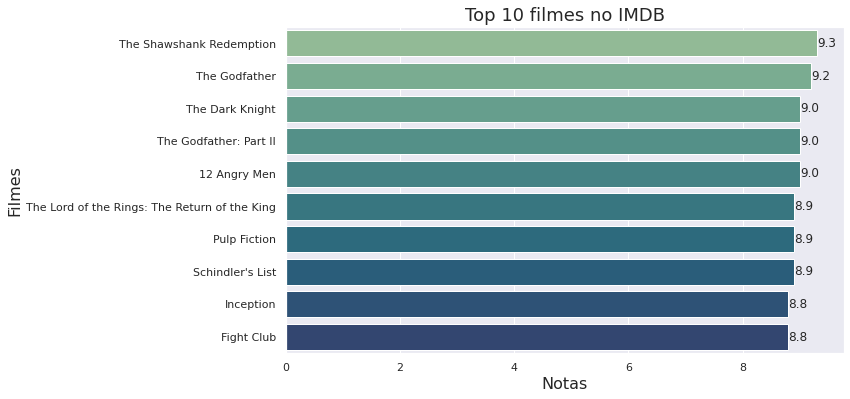

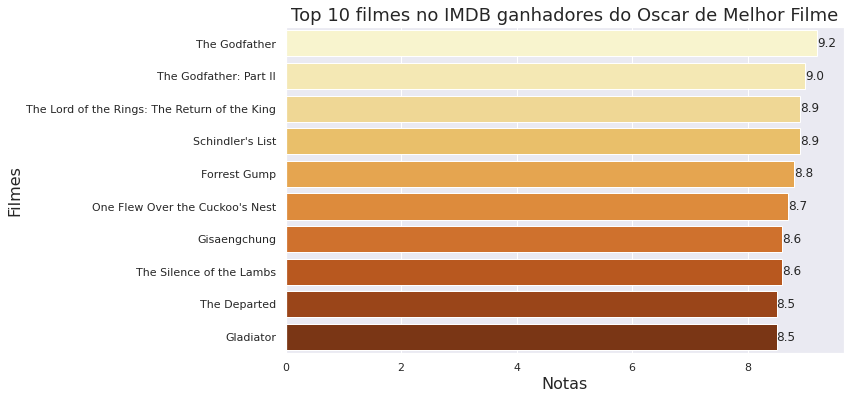

In [15]:
plt.figure(figsize=(10,6))
ax = sns.barplot(data = dados_desejados.head(10),y="filme", x="rating", palette = "crest")

for p in ax.patches:
    width = p.get_width()  
    ax.text(width,       
            p.get_y() + p.get_height() / 2,
            '{:1.1f}'.format(width),
            ha = 'left',   
            va = 'center')

plt.title("Top 10 filmes no IMDB", fontsize=18)
plt.xlabel("Notas", fontsize=16)
plt.ylabel("Filmes", fontsize=16)
plt.show()

plt.figure(figsize=(10,6))
ax = sns.barplot(data = dados_desejados.query('Oscar == "Sim"').head(10),y="filme", x="rating", palette = "YlOrBr")

for p in ax.patches:
    width = p.get_width()  
    ax.text(width,       
            p.get_y() + p.get_height() / 2,
            '{:1.1f}'.format(width),
            ha = 'left',   
            va = 'center')

plt.title("Top 10 filmes no IMDB ganhadores do Oscar de Melhor Filme", fontsize=18)
plt.xlabel("Notas", fontsize=16)
plt.ylabel("Filmes", fontsize=16)
plt.show()

###**3.2 Quantos filmes ganhadores do Oscar de melhor filme estão no top 1000 do IMDB**

Bom, sabemos que foram 93 edições de entrega de Oscar, incluindo a temporada de 2021. E abaixo vemos que 59 dos 93 filmes que já ganharam o Oscar de melhor filme estão no top 1000 do IMBD. Ou seja, 34 filmes que já ganharam essa estatueta não estão nem entre os top 1000 do IMDB.

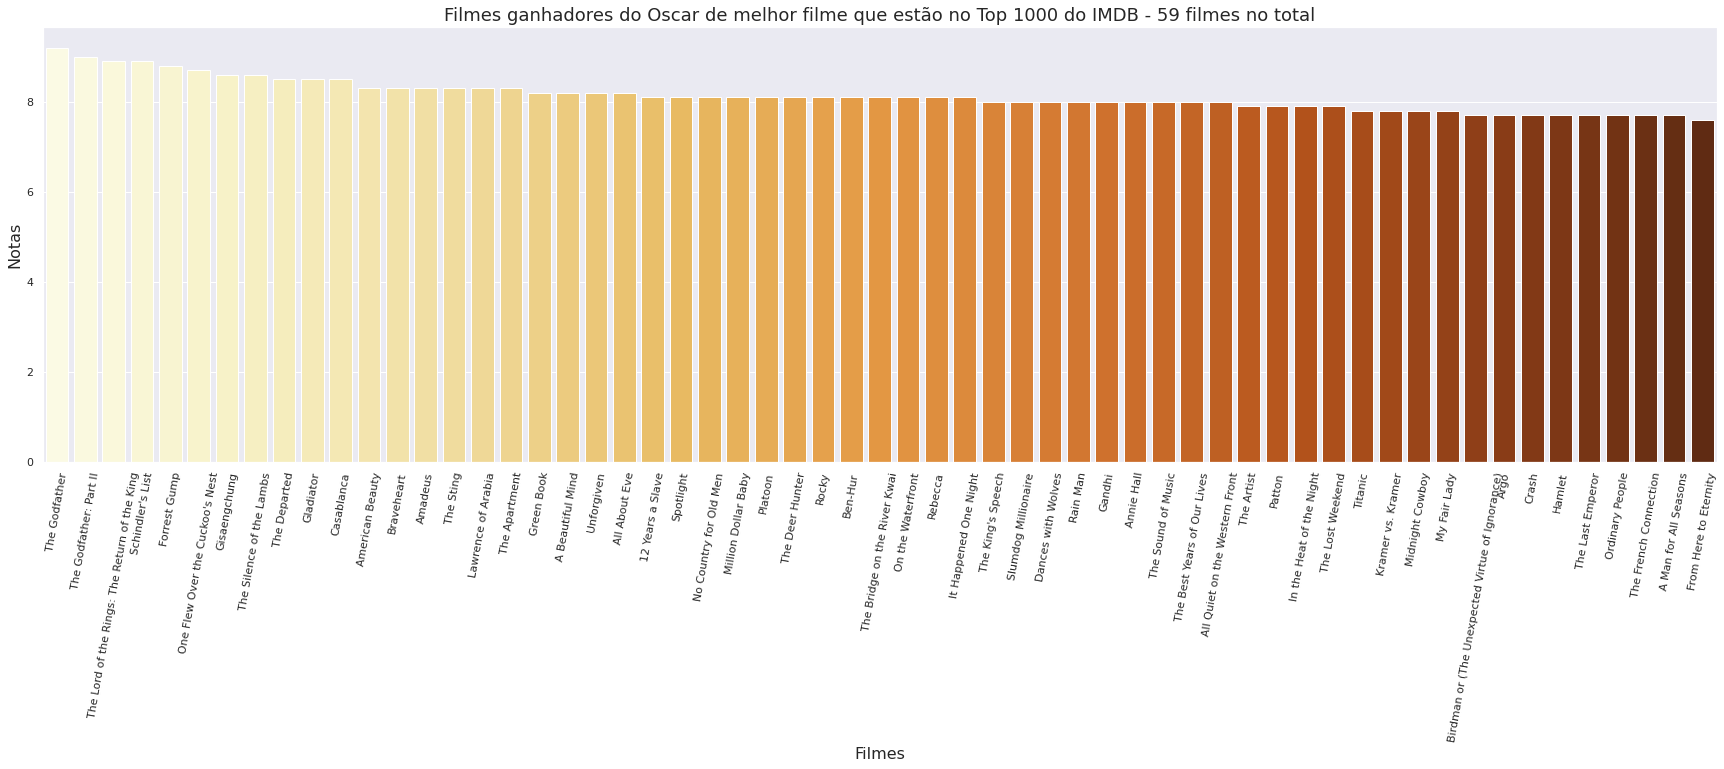

In [16]:
plt.figure(figsize=(30,8))
ax = sns.barplot(data = dados_desejados.query('Oscar == "Sim"'),x="filme", y="rating", palette = "YlOrBr")

plt.title("Filmes ganhadores do Oscar de melhor filme que estão no Top 1000 do IMDB - 59 filmes no total", fontsize=18)
plt.xlabel("Filmes", fontsize=16)
plt.ylabel("Notas", fontsize=16)
plt.xticks(rotation = 80)
plt.show()

###**3.3 Atores que mais protagonizaram filmes do TOP 1000 IMDB**

Agora vamos falar dos protagonistas, aqueles que muitas vezes levam o filme nas costas, e se a história é boa tem tudo para ser um grande sucesso.

Foi levantado o top 30 dos atores que mais protagonizaram filmes que estão entre os TOP 1000 do IMDB. Sem dúvida é uma lista com excelentes atores, sendo Tom Hanks o ator que mais protagonizou os filmes dessa lista, 12 filmes no total. Lembrando que Tom Hanks já levantou a estatueta de melhor ator em duas oportunidades.

Em seguida vem Robert De Niro com 11 filmes, Clint Eastwood e Al Pacino com 10 e Leonardo de Caprio e Humphrey Bogart com 10, só para citar alguns.

Um fato curioso fica para o ator Danil Day Lewis que não aparece na lista dos top 30 mas foi o ator que mais ganhou Oscar de melhor ator, 3 vezes no total.

In [17]:
protagonistas = dados_desejados.groupby(['protagonista']).count()
protagonistas = protagonistas.sort_values(by='filme', ascending=False)
protagonistas = protagonistas.head(30)

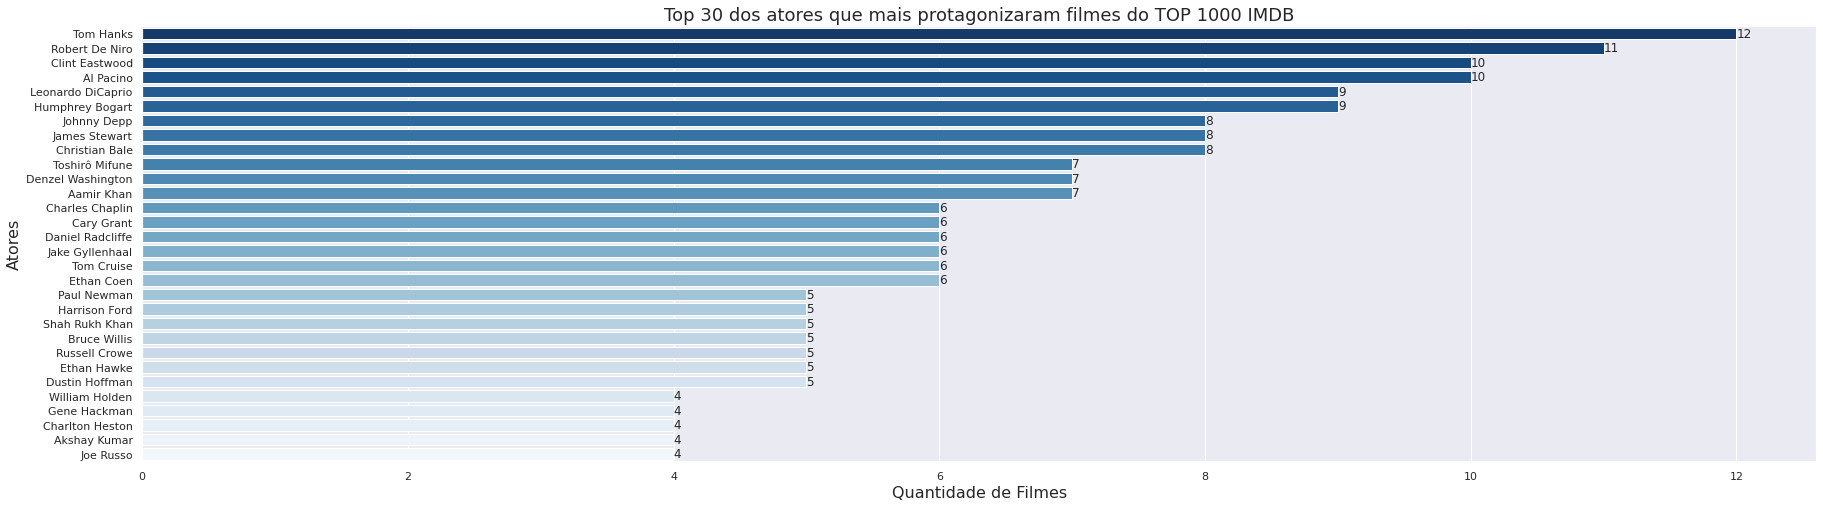

In [18]:
plt.figure(figsize=(30,8))
ax = sns.barplot(y=protagonistas.index, x=protagonistas['filme'],  data=protagonistas,palette="Blues_r")


for p in ax.patches:
    width = p.get_width()
    ax.text(width,       
            p.get_y() + p.get_height() / 2,
            '{:1.0f}'.format(width),
            ha = 'left',   
            va = 'center')

plt.title("Top 30 dos atores que mais protagonizaram filmes do TOP 1000 IMDB", fontsize=18)
plt.ylabel("Atores", fontsize=16)
plt.xlabel("Quantidade de Filmes", fontsize=16)
plt.show()

###**3.4 Atores que mais foram coadjuvantes nos filmes do TOP 1000 do IMDB**

Levantamos os top 30 dos atores que mais fizeram papel de coadjuvante no top 1000 do IMDB. E em primeiro lugar aparece a atriz Emma Watson, a eterna Hermione, com 7 participações, seguida por Matt Damon (5), e  Diane Keaton, Ian McKellen, Brad Pitt, Ed Harris, Julie Delpy, Kate Winslet, Chris Evans e Meryl Streep com 4 participações.

AL Pacino com 10 participações em filmes dessa lista como protagonista, agora aparece em mais 3 como coadjuvante.

In [19]:
coadjuvantes = dados_desejados.groupby(['coadjuvante']).count()
coadjuvantes = coadjuvantes.sort_values(by='filme', ascending=False)
coadjuvantes = coadjuvantes.head(30)

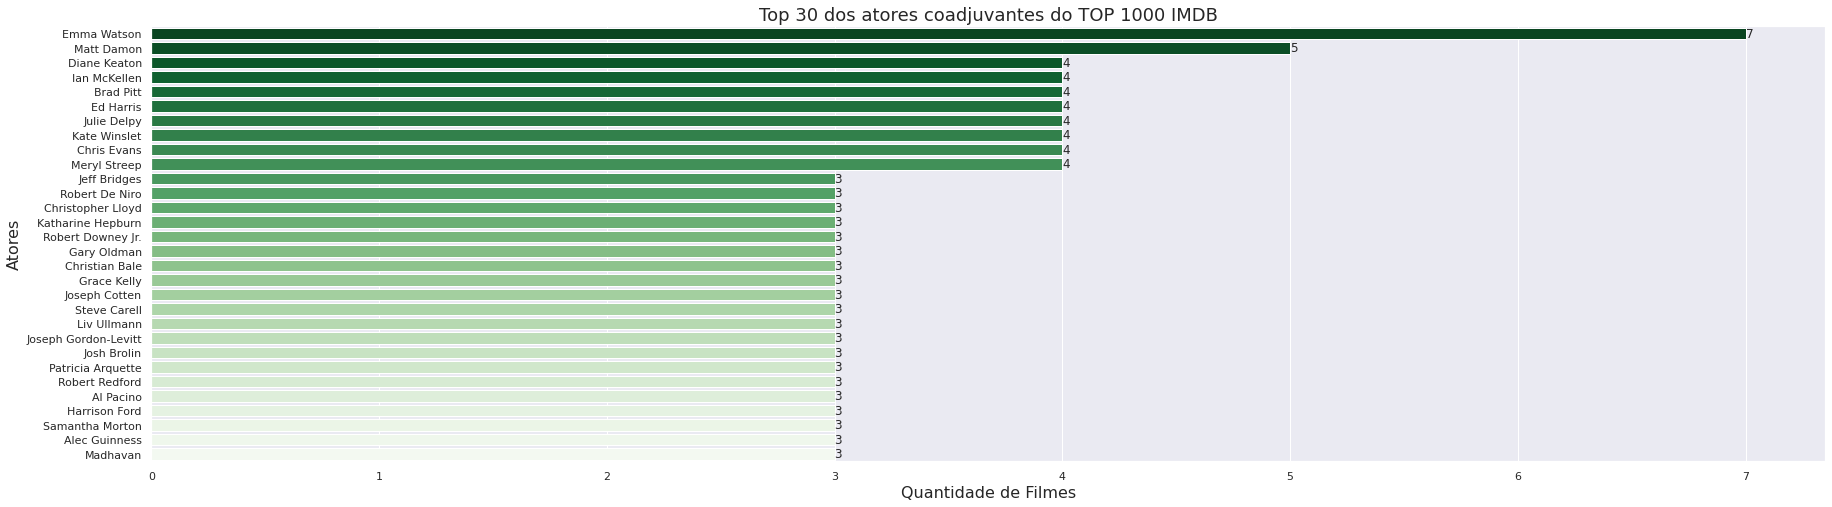

In [20]:
plt.figure(figsize=(30,8))
ax = sns.barplot(y=coadjuvantes.index, x=coadjuvantes['filme'],  data=coadjuvantes,palette="Greens_r")


for p in ax.patches:
    width = p.get_width()
    ax.text(width,       
            p.get_y() + p.get_height() / 2,
            '{:1.0f}'.format(width),
            ha = 'left',   
            va = 'center')

plt.title("Top 30 dos atores coadjuvantes do TOP 1000 IMDB", fontsize=18)
plt.ylabel("Atores", fontsize=16)
plt.xlabel("Quantidade de Filmes", fontsize=16)
plt.show()

###**3.5 Gêneros dos filmes que mais aparecem no TOP 1000 IMDB**

Geralmente os filmes são classificados em gênero tais como drama, romance, comédia, ação, terror, etc além de combinações de tais gêneros como comédia romântica.

E olhando os top 30 dessa lista, em primeiro lugar disparado com 85 filmes vem o gênero drama, e mais, quase todas os gêneros seguintes tem drama como uma das suas classificações. Então o gênero drama costuma ser o queridinho quando se trata de melhores filmes.

In [21]:
generos = dados_desejados.groupby(['genero']).count()
generos = generos.sort_values(by='filme', ascending=False)
generos = generos.head(30)

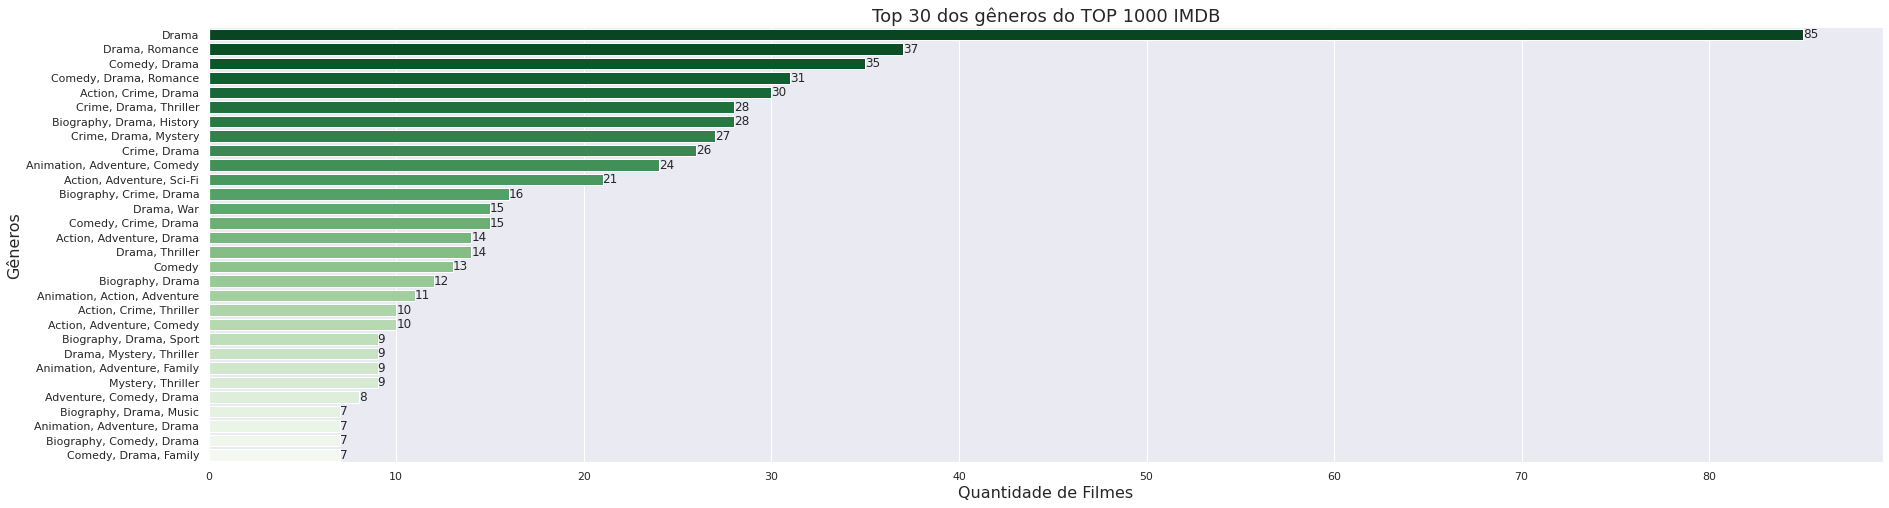

In [22]:
plt.figure(figsize=(30,8))
ax = sns.barplot(y=generos.index, x=generos['filme'],  data=generos,palette="Greens_r")


for p in ax.patches:
    width = p.get_width()
    ax.text(width,       
            p.get_y() + p.get_height() / 2,
            '{:1.0f}'.format(width),
            ha = 'left',   
            va = 'center')

plt.title("Top 30 dos gêneros do TOP 1000 IMDB", fontsize=18)
plt.ylabel("Gêneros", fontsize=16)
plt.xlabel("Quantidade de Filmes", fontsize=16)
plt.show()

##**4. Conclusão**

Apresentamos alguns dados e fatos sobre os filmes que estão entre os TOP 1000 do IMBD, e sabemos que filme não é uma matéria exata, ele está mais para subjetivo quando se trata de escolhermos qual o melhor filme. Como exemplo citado, vimos que Um sonho de Liberdade que já está há vários anos encabeçando a lista do IMDB não foi exatamente um sucesso de público nos cinemas e muito menos ganhou Oscar, porém na votação popular é considerado o melhor filme.

E vimos também que 34 filmes ganhadores do Oscar de melhor filme se quer aparecem entre os top 1000 do IMDB, mas um indicío da subjetividade do tema.

Entre os atores que mais protagonizaram filmes do top 1000 IMDB não teve grandes supresas, pelo menos nos top 30 aparecem grandes atores, pode ser que tenha faltado alguns mas não daria para reclamar da qualidade da lista.

Na parte dos coadjuvantes também temos grandes atores figurando entre os primeiros lugares, com destaque para Emma watson.

E quanto aos gêneros dos filmes, a categoria Drama foi o grande destaque, indicando que quando se trata de drama já tem uma boa probabilidade do filme agradar os telespectadores.

##**5. Referências**

- https://pt.wikipedia.org/wiki/IMDb
- https://portaldatascience.com/kaggle/
- https://www.kaggle.com/omarhanyy/imdb-top-1000
- https://pt.wikipedia.org/wiki/Oscar_de_melhor_filme
- https://pt.wikipedia.org/wiki/The_Shawshank_Redemption